# 1. Setup

## 📦 Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
import re
import string
from nltk.corpus import stopwords
import nltk

In [135]:
from textblob import TextBlob


In [183]:
from sklearn.feature_extraction.text import CountVectorizer

In [190]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')


# 2. Load & Inspect Data

## 📂 Loading the Dataset

In [5]:
fullc_df = pd.read_csv("complaints.csv.zip")

C:\Users\admin\AppData\Local\Temp\ipykernel_22688\1213973272.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  fullc_df = pd.read_csv("complaints.csv.zip")


## 🧾 Initial Data Exploration

In [15]:
fullc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9589250 entries, 0 to 9589249
Data columns (total 18 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Date received                 datetime64[ns]
 1   Product                       object        
 2   Sub-product                   object        
 3   Issue                         object        
 4   Sub-issue                     object        
 5   Consumer complaint narrative  object        
 6   Company public response       object        
 7   Company                       object        
 8   State                         object        
 9   ZIP code                      object        
 10  Tags                          object        
 11  Consumer consent provided?    object        
 12  Submitted via                 object        
 13  Date sent to company          datetime64[ns]
 14  Company response to consumer  object        
 15  Timely response?              ob

In [11]:
fullc_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-13,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,"EQUIFAX, INC.",NY,11433,NaN,NaN,Web,2025-06-13,In progress,Yes,NaN,14072365
1,2025-06-13,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",NJ,07047,NaN,NaN,Web,2025-06-13,In progress,Yes,NaN,14072555
2,2025-06-13,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",NH,03051,NaN,NaN,Web,2025-06-13,In progress,Yes,NaN,14072377
3,2025-06-13,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Investigation took more than 30 days,NaN,NaN,"EQUIFAX, INC.",CA,94080,NaN,NaN,Web,2025-06-13,In progress,Yes,NaN,14072294
4,2025-06-13,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",CA,92583,NaN,NaN,Web,2025-06-13,In progress,Yes,NaN,14072340


In [53]:
recent_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Year,Month,Weekday
0,2025-06-13,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,"EQUIFAX, INC.",NY,11433,...,NaN,Web,2025-06-13,In progress,Yes,NaN,14072365,2025,6,Friday
1,2025-06-13,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",NJ,07047,...,NaN,Web,2025-06-13,In progress,Yes,NaN,14072555,2025,6,Friday
2,2025-06-13,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",NH,03051,...,NaN,Web,2025-06-13,In progress,Yes,NaN,14072377,2025,6,Friday
3,2025-06-13,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Investigation took more than 30 days,NaN,NaN,"EQUIFAX, INC.",CA,94080,...,NaN,Web,2025-06-13,In progress,Yes,NaN,14072294,2025,6,Friday
4,2025-06-13,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",CA,92583,...,NaN,Web,2025-06-13,In progress,Yes,NaN,14072340,2025,6,Friday


## 🧾 Initial Data Exploration

In [95]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, 3482032 to 9057020
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Date received                 500000 non-null  datetime64[ns]
 1   Product                       500000 non-null  object        
 2   Sub-product                   499993 non-null  object        
 3   Issue                         499998 non-null  object        
 4   Sub-issue                     482030 non-null  object        
 5   Consumer complaint narrative  174283 non-null  object        
 6   Company public response       288193 non-null  object        
 7   Company                       500000 non-null  object        
 8   State                         497801 non-null  object        
 9   ZIP code                      499132 non-null  object        
 10  Tags                          30663 non-null   object        
 11  Consumer co

## 🧾 Initial Data Exploration

In [130]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, 3482032 to 9057020
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Date received                 500000 non-null  datetime64[ns]
 1   Product                       500000 non-null  object        
 2   Sub-product                   499993 non-null  object        
 3   Issue                         499998 non-null  object        
 4   Sub-issue                     482030 non-null  object        
 5   Consumer complaint narrative  174283 non-null  object        
 6   Company public response       288193 non-null  object        
 7   Company                       500000 non-null  object        
 8   State                         500000 non-null  object        
 9   ZIP code                      499132 non-null  object        
 10  Tags                          30663 non-null   object        
 11  Consumer co

## 🧾 Initial Data Exploration

In [143]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, 3482032 to 9057020
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Date received                 500000 non-null  datetime64[ns]
 1   Product                       500000 non-null  object        
 2   Sub-product                   499993 non-null  object        
 3   Issue                         499998 non-null  object        
 4   Sub-issue                     482030 non-null  object        
 5   Consumer complaint narrative  174283 non-null  object        
 6   Company public response       288193 non-null  object        
 7   Company                       500000 non-null  object        
 8   State                         500000 non-null  object        
 9   ZIP code                      499132 non-null  object        
 10  Tags                          30663 non-null   object        
 11  Consumer co

## 🧾 Initial Data Exploration

In [154]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, 3482032 to 9057020
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Date received                 500000 non-null  datetime64[ns]
 1   Product                       500000 non-null  object        
 2   Sub-product                   499993 non-null  object        
 3   Issue                         499998 non-null  object        
 4   Sub-issue                     482030 non-null  object        
 5   Consumer complaint narrative  174283 non-null  object        
 6   Company public response       288193 non-null  object        
 7   Company                       500000 non-null  object        
 8   State                         500000 non-null  object        
 9   ZIP code                      499132 non-null  object        
 10  Tags                          30663 non-null   object        
 11  Consumer co

## 🧾 Initial Data Exploration

In [163]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Date received                 500000 non-null  datetime64[ns]
 1   Product                       500000 non-null  object        
 2   Sub-product                   499993 non-null  object        
 3   Issue                         499998 non-null  object        
 4   Sub-issue                     482030 non-null  object        
 5   Consumer complaint narrative  174283 non-null  object        
 6   Company public response       288193 non-null  object        
 7   Company                       500000 non-null  object        
 8   State                         500000 non-null  object        
 9   ZIP code                      499132 non-null  object        
 10  Tags                          30663 non-null   object        
 11  Consumer cons

In [232]:
credit_bureaus_df.head()

,Company,Headquarters,Founded,Employees,"Revenue (2023, USD)",Market Cap (USD),Presence (Countries),U.S. Consumer Records,Clients / Partners
0,Equifax Inc.,"Atlanta, GA, USA",1899,14000,5.100000e+09,~$25–30B,24,~120 million,Thousands of institutions and agencies
1,"TransUnion Intermediate Holdings, Inc.","Chicago, IL, USA",1968,12000,4.000000e+09,~$12–15B,30,~200 million,"65,000+ businesses"
2,Experian Information Solutions Inc.,"Costa Mesa, CA, USA / Dublin, Ireland",1996,22000,7.500000e+09,~$35–40B,45,~235 million,"100,000+ clients"


# 3. Data Cleaning

## 🧹 Handling Missing Values

In [97]:
sample_df['State'] = sample_df['State'].fillna('Unknown')


## 🧹 Handling Missing Values

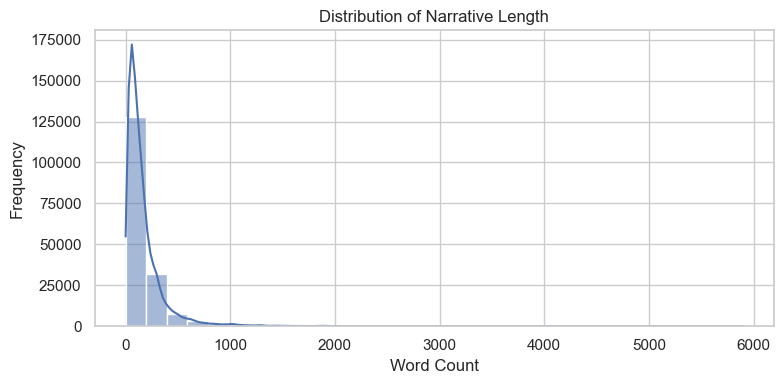

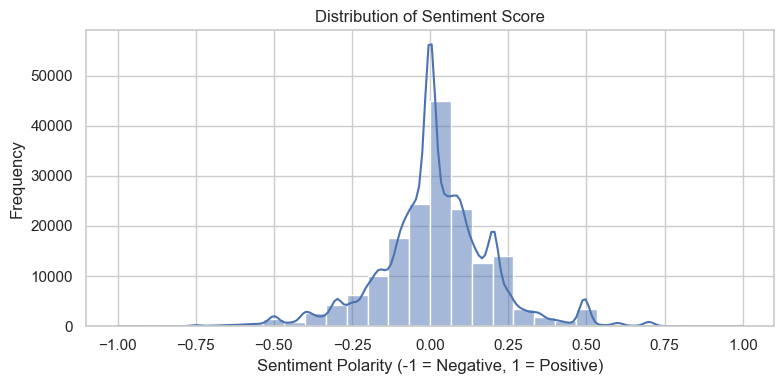

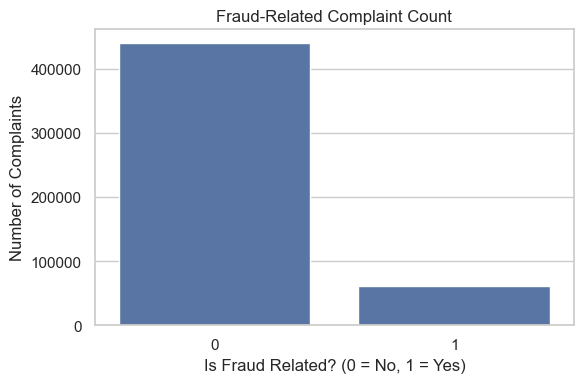

In [150]:
sns.set(style="whitegrid")

# 1. Distribution of Narrative Length
plt.figure(figsize=(8, 4))
sns.histplot(sample_df['narrative_length'].dropna(), bins=30, kde=True)
plt.title("Distribution of Narrative Length")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 2. Distribution of Sentiment Score
plt.figure(figsize=(8, 4))
sns.histplot(sample_df['sentiment_score'].dropna(), bins=30, kde=True)
plt.title("Distribution of Sentiment Score")
plt.xlabel("Sentiment Polarity (-1 = Negative, 1 = Positive)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 3. Count of Fraud-Related Complaints
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud_related', data=sample_df)
plt.title("Fraud-Related Complaint Count")
plt.xlabel("Is Fraud Related? (0 = No, 1 = Yes)")
plt.ylabel("Number of Complaints")
plt.tight_layout()
plt.show()

## 🧹 Handling Missing Values

In [156]:
state_pop = {
    'CA': 39500000, 'TX': 29000000, 'FL': 21500000, 'NY': 19500000,
    'PA': 12800000, 'IL': 12600000, 'OH': 11700000, 'GA': 10700000,
    'NC': 10500000, 'MI': 10000000, 'NJ': 8900000, 'VA': 8600000,
    'WA': 7600000, 'AZ': 7300000, 'MA': 6900000, 'TN': 6900000,
    'IN': 6800000, 'MO': 6100000, 'MD': 6100000, 'WI': 5800000,
    'CO': 5800000, 'MN': 5700000, 'SC': 5200000, 'AL': 5000000,
    'LA': 4600000, 'KY': 4500000, 'OR': 4300000, 'OK': 4000000,
    'CT': 3600000, 'UT': 3300000, 'IA': 3200000, 'NV': 3100000,
    'AR': 3000000, 'MS': 2900000, 'KS': 2900000, 'NM': 2100000,
    'NE': 1900000, 'WV': 1800000, 'ID': 1800000, 'HI': 1400000,
    'NH': 1400000, 'ME': 1300000, 'MT': 1100000, 'RI': 1100000,
    'DE': 1000000, 'SD': 900000, 'ND': 800000, 'AK': 730000,
    'VT': 640000, 'WY': 580000, 'DC': 710000
}

# 2. Count complaints per state
state_counts = sample_df['State'].value_counts().rename_axis('State').reset_index(name='complaint_count')

# 3. Add population and calculate complaints per 100k
state_counts['population'] = state_counts['State'].map(state_pop)
state_counts['complaints_per_100k'] = (state_counts['complaint_count'] / state_counts['population']) * 100000

# 4. Merge back into sample_df
sample_df = sample_df.merge(
    state_counts[['State', 'complaints_per_100k']],
    on='State',
    how='left'
)

sample_df[['State', 'complaints_per_100k']].dropna().drop_duplicates().sort_values(by='complaints_per_100k', ascending=False).head(10)

,State,complaints_per_100k
7,GA,348.906542
0,FL,310.530233
61,DC,278.028169
141,DE,255.500000
41,NV,237.000000
37,LA,221.673913
44,MD,211.950820
22,TX,209.148276
81,AL,205.000000
14,PA,193.664062


## 🧹 Handling Missing Values

In [181]:
print(sample_df[sample_df["Product"] == "Credit Reporting & Repair Services"]["Sub-product"].value_counts(dropna=False))

Sub-product
Credit reporting                  397012
Other personal consumer report      2088
Credit repair services               350
Name: count, dtype: int64


## 🧹 Handling Missing Values

In [202]:
print(sample_df[sample_df["Product"] == "Credit Reporting & Repair Services"]["Sub-issue"].value_counts(dropna=False))

Sub-issue
Information belongs to someone else                                                      125627
Reporting company used your report improperly                                             75009
Their investigation did not fix an error on your report                                   51141
Credit inquiries on your report that you don't recognize                                  36409
Account information incorrect                                                             25130
Investigation took more than 30 days                                                      22999
Account status incorrect                                                                  19827
Was not notified of investigation status or results                                       11886
Personal information incorrect                                                            11790
Difficulty submitting a dispute or getting information about a dispute over the phone      3078
Public record information inac

## 🧹 Handling Missing Values

In [ ]:
print(sample_df[sample_df["Product"] == "Credit Reporting & Repair Services"]["Issue"].value_counts(dropna=False))

# 4. Exploratory Analysis

## 📊 Value Counts / Frequency Analysis

In [145]:
sample_df['is_fraud_related'].value_counts()


is_fraud_related
0    439199
1     60801
Name: count, dtype: int64

## 📊 Value Counts / Frequency Analysis

In [212]:
sample_df[["Product"]].value_counts()

Product                                           
Credit Reporting & Repair Services                    399450
Debt collection                                        35537
Checking or savings account                            16793
Credit card or prepaid card                            12209
Mortgage                                               10259
Credit card                                             8404
Money transfer, virtual currency, or money service      5731
Vehicle loan or lease                                   4348
Student loan                                            3578
Payday, Title & Personal Loans                          2706
Prepaid card                                             741
Debt or credit management                                244
Name: count, dtype: int64

## 📊 Value Counts / Frequency Analysis

In [179]:
sample_df[["Product"]].value_counts()

Product                                           
Credit Reporting & Repair Services                    399450
Debt collection                                        35537
Checking or savings account                            16793
Credit card or prepaid card                            12209
Mortgage                                               10259
Credit card                                             8404
Money transfer, virtual currency, or money service      5731
Vehicle loan or lease                                   4348
Student loan                                            3578
Payday, Title & Personal Loans                          2706
Prepaid card                                             741
Debt or credit management                                244
Name: count, dtype: int64

## 📊 Value Counts / Frequency Analysis

In [238]:
sample_df.Company.value_counts()

Company
EQUIFAX, INC.                             129776
TRANSUNION INTERMEDIATE HOLDINGS, INC.    126965
Experian Information Solutions Inc.       118960
CAPITAL ONE FINANCIAL CORPORATION           6474
JPMORGAN CHASE & CO.                        5786
                                           ...  
Denali Capital Holdings, LLC                   1
DIRECMANAGEMENT, INC.                          1
Deal Depot, Inc.                               1
Springer Collections Inc.                      1
Capital Markets Cooporative, LLC               1
Name: count, Length: 2909, dtype: int64

## 📊 Value Counts / Frequency Analysis

In [240]:
sample_df['Company'].value_counts().head(10)

Company
EQUIFAX, INC.                             129776
TRANSUNION INTERMEDIATE HOLDINGS, INC.    126965
Experian Information Solutions Inc.       118960
CAPITAL ONE FINANCIAL CORPORATION           6474
JPMORGAN CHASE & CO.                        5786
WELLS FARGO & COMPANY                       5528
BANK OF AMERICA, NATIONAL ASSOCIATION       5520
CITIBANK, N.A.                              4361
SYNCHRONY FINANCIAL                         2886
AMERICAN EXPRESS COMPANY                    2270
Name: count, dtype: int64

# 6. Text Cleaning / NLP

## ✍️ Text Cleaning or Feature Engineering

In [107]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'\n', ' ', text)           
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)  
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

sample_df['clean_text'] = sample_df['Consumer complaint narrative'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [111]:
valid_text_mask = sample_df['clean_text'] != ""
texts_to_embed = sample_df.loc[valid_text_mask, 'clean_text']

## ✍️ Text Cleaning or Feature Engineering

In [137]:
# Narrative Length
sample_df['narrative_length'] = sample_df['Consumer complaint narrative'].apply(
    lambda x: len(x.split()) if pd.notnull(x) else None
)


## ✍️ Text Cleaning or Feature Engineering

In [139]:
# Sentiment Score
def get_sentiment(text):
    if pd.isnull(text) or not text.strip():
        return None
    return TextBlob(text).sentiment.polarity

sample_df['sentiment_score'] = sample_df['Consumer complaint narrative'].apply(get_sentiment)

## ✍️ Text Cleaning or Feature Engineering

In [140]:
# Expanded Fraud
fraud_keywords = [
    'fraud', 'scam', 'scammer', 'scammed', 'deceit', 'dishonest', 'fake', 'forged', 'forgery', 'impersonation',
    'unauthorized', 'unapproved', 'unknown transaction', 'not me', 'didn’t authorize', 'charged without consent',
    'identity theft', 'stolen identity', 'stolen info', 'data breach', 'personal data used', 'hacked', 'compromised account',
    'fake charges', 'phantom charges', 'overcharged', 'duplicate charge', 'false billing', 'incorrect billing', 'wrong charge',
    'threatened', 'forced', 'intimidated', 'coerced', 'phishing', 'spam', 'robocall', 'misleading', 'misrepresented',
    'fake loan', 'payday scam', 'predatory lending', 'bait and switch', 'hidden fees', 'tricked', 'misleading terms'
]

sample_df['is_fraud_related'] = sample_df['Consumer complaint narrative'].apply(
    lambda x: int(any(keyword in x.lower() for keyword in fraud_keywords)) if pd.notnull(x) else 0
)

In [169]:
def clean_product_name(prod):
    if prod in [
        'Credit reporting or other personal consumer reports',
        'Credit reporting, credit repair services, or other personal consumer reports'
    ]:
        return 'Credit Reporting & Repair Services'
    return prod

sample_df['Product'] = sample_df['Product'].apply(clean_product_name)

In [171]:
def merge_payday_products(prod):
    if prod in [
        'Payday loan, title loan, or personal loan',
        'Payday loan, title loan, personal loan, or advance loan'
    ]:
        return 'Payday, Title & Personal Loans'
    return prod

sample_df['Product'] = sample_df['Product'].apply(merge_payday_products)

In [185]:
texts = sample_df[
    (sample_df["Product"] == "Credit Reporting & Repair Services") & 
    (sample_df["has_narrative"] == 1)
]["clean_text"]

vectorizer = CountVectorizer(max_features=30, stop_words='english')
X = vectorizer.fit_transform(texts)

print(dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).A1)))

{'15': 114931, '1681': 48862, 'account': 168504, 'accounts': 88614, 'act': 44559, 'agency': 61038, 'balance': 37900, 'consumer': 179754, 'credit': 284846, 'date': 41678, 'fair': 41893, 'fcra': 34770, 'identity': 41282, 'inaccurate': 54623, 'information': 195052, 'items': 47242, 'late': 39256, 'number': 35069, 'payment': 41972, 'remove': 35455, 'report': 198924, 'reporting': 162675, 'rights': 35752, 'section': 83770, 'states': 48886, 'theft': 35898, 'usc': 95775, 'written': 34189, 'xxxx': 1874742, 'xxxxxxxx': 113874}


# 7. Other


In [13]:
fullc_df['Date received'] = pd.to_datetime(fullc_df['Date received'], errors='coerce')
fullc_df['Date sent to company'] = pd.to_datetime(fullc_df['Date sent to company'], errors='coerce')

In [17]:
fullc_df['Year'] = fullc_df['Date received'].dt.year
fullc_df['Month'] = fullc_df['Date received'].dt.month
fullc_df['Weekday'] = fullc_df['Date received'].dt.day_name()

In [55]:
fullc_df.shape

(9589250, 21)

In [19]:
print(fullc_df['Date received'].min())
print(fullc_df['Date received'].max())


2011-12-01 00:00:00
2025-06-21 00:00:00


In [35]:
print(recent_df.memory_usage(deep=True).sum() / (1024 ** 2))


4860.206383705139


In [36]:
recent_df.shape

(4036510, 21)

In [51]:
recent_df.nunique()

Date received                       362
Product                              11
Sub-product                          55
Issue                                88
Sub-issue                           209
Consumer complaint narrative     505947
Company public response              10
Company                            3695
State                                60
ZIP code                          21648
Tags                                  3
Consumer consent provided?            4
Submitted via                         4
Date sent to company                362
Company response to consumer          5
Timely response?                      2
Consumer disputed?                    0
Complaint ID                    4036510
Year                                  2
Month                                12
Weekday                               7
dtype: int64

In [59]:
# Filter from Jan 1, 2019 to Dec 31, 2022
start_date = pd.Timestamp("2020-01-01")
end_date = pd.Timestamp("2024-12-31")

df_2019_2022 = fullc_df[
    (fullc_df['Date received'] >= start_date) &
    (fullc_df['Date received'] <= end_date)
].copy()

# Check shape and size
print("Shape:", df_2019_2022.shape)

# Optional: Check memory usage
print(df_2019_2022.memory_usage(deep=True).sum() / (1024 ** 2))

Shape: (5770390, 21)
7782.710597991943


In [61]:
sample_df = df_2019_2022.sample(n=500_000, random_state=42)

In [63]:
print(sample_df.memory_usage(deep=True).sum() / (1024 ** 2))

674.3172416687012


In [65]:
sample_df.shape

(500000, 21)

In [69]:
sample_df.to_csv("complaints_5yr_sample_full.csv", index=False)

In [81]:
sample_df.drop(columns=['Consumer disputed?'], inplace=True)

In [85]:
sample_df.rename(columns={
    'Year': 'Year_received',
    'Month': 'Month_received',
    'Weekday': 'Weekday_received'
}, inplace=True)

In [89]:
sample_df['Year_sent'] = sample_df['Date sent to company'].dt.year
sample_df['Month_sent'] = sample_df['Date sent to company'].dt.month
sample_df['Weekday_sent'] = sample_df['Date sent to company'].dt.day_name()

In [93]:
sample_df['Days_to_respond'] = (sample_df['Date sent to company'] - sample_df['Date received']).dt.days


In [102]:
sample_df['has_narrative'] = sample_df['Consumer complaint narrative'].notnull().astype(int)

In [109]:
sample_df.nunique()

Date received                     1826
Product                             14
Sub-product                         57
Issue                               92
Sub-issue                          209
Consumer complaint narrative    140276
Company public response             10
Company                           2909
State                               61
ZIP code                         17545
Tags                                 3
Consumer consent provided?           4
Submitted via                        6
Date sent to company              1853
Company response to consumer         5
Timely response?                     2
Complaint ID                    500000
Year_received                        5
Month_received                      12
Weekday_received                     7
Year_sent                            6
Month_sent                          12
Weekday_sent                         7
Days_to_respond                    143
has_narrative                        2
clean_text               

In [121]:
# !pip install -U sentence-transformers

In [124]:
print(sample_df.memory_usage(deep=True).sum() / (1024 ** 2))


833.1930561065674


In [126]:
sample_df.to_csv("complaints_sample.csv", index=False)

In [128]:
sample_df.rename(columns={'Days_to_respond': 'CFPB to Company'}, inplace=True)

In [152]:
sample_df.to_csv("complaints_with_narrative_features.csv", index=False)

In [161]:
# sample_df.to_csv("complaints_with_per_capita.csv", index=False)

In [165]:
print("Total complaints in 2025:", sample_df[sample_df['Year_received'] == 2025].shape[0])

Total complaints in 2025: 0


In [217]:
sample_df.to_csv("complaints.csv", index=False)

In [230]:
data = {
    "Company": [
        "Equifax Inc.",
        "TransUnion Intermediate Holdings, Inc.",
        "Experian Information Solutions Inc."
    ],
    "Headquarters": [
        "Atlanta, GA, USA",
        "Chicago, IL, USA",
        "Costa Mesa, CA, USA / Dublin, Ireland"
    ],
    "Founded": [1899, 1968, 1996],
    "Employees": [14000, 12000, 22000],
    "Revenue (2023, USD)": [5.1e9, 4.0e9, 7.5e9],
    "Market Cap (USD)": ["~$25–30B", "~$12–15B", "~$35–40B"],
    "Presence (Countries)": [24, 30, 45],
    "U.S. Consumer Records": ["~120 million", "~200 million", "~235 million"],
    "Clients / Partners": [
        "Thousands of institutions and agencies",
        "65,000+ businesses",
        "100,000+ clients"
    ]
}

# Create the DataFrame
credit_bureaus_df = pd.DataFrame(data)

In [234]:
credit_bureaus_df.to_csv("companies.csv", index=False)